# Perceptron algorithm (exercise)

In this exercise, implement a single neuron (perceptron) that classifies two groups of flowers from the Iris dataset.

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, a linear discriminant model can be developed to distinguish the species from each other.

For the purpose of this exercise, you will only use two features (sepal length and sepal width) of two species of flowers (Setosa and Versicolor).

Implemnetation of Minsky and Pepert (1969) learning algorithem.

In [ ]:
# allows inline plotting below each cell
%matplotlib inline

In [10]:
# import necessary libraries 
import numpy as np
import matplotlib.pyplot as plt

In [333]:
# write a function that plots data and linear classifier

def plot_border(w1, b1, data):
    fig = plt.figure(figsize = (6,6))
    
    plt.scatter(x = data[:,0], y = data[:,1], c=data[:,2])
    
    x_ticks = np.arange(-2,2)
    
    #construct the x axis for plotting the line
    x_graph =  np.repeat([x_ticks], 2, axis=0)
    
#     print("w {}".format(w1.shape))
    #compute the linear function's datapoints
    y_plot = w1 * x_graph
    
    plt.plot(y_plot[0], y_plot[1])
    plt.xticks(np.arange(-2,2.5, 0.5))
    plt.yticks(np.arange(-2,2.5, 0.5))
    plt.xlim(-2, 2)
    plt.ylim(-2,2)
    

In [281]:
# write a prediction function: 0 for Iris-setosa and 1 for Iris-versicolor
def guess_flower(sepal_length, sepal_width):
    """
    Predicts the flower type based on the condition
    wx > 0 Type is a 1
    wx < 0 Type is a 0
    """
    y_hat = []
    
    x_flat = np.concatenate((sepal_length, sepal_width), axis=0)

    x_pred = np.reshape(x_flat, (int(len(x_flat)/2), 2))
    
    wx = np.dot(w1.T,x_pred.T)

    for i in range(wx.shape[1]):
        if wx[:,i] > 0:
            y_hat.append(1)
        elif wx[:,i] < 0:
            y_hat.append(0)
    
    return np.asarray(y_hat)

In [257]:
### load data ###

# each point is a tuple (sepal length, sepal width, flower type)
# types: 0 for Setosa & 1 for Versicolor
training_data = np.asarray([[ 5.1,  3.5,  0 ],
       [ 4.9,  3. ,  0 ],
       [ 4.7,  3.2,  0 ],
       [ 4.6,  3.1,  0 ],
       [ 5. ,  3.6,  0 ],
       [ 5.4,  3.9,  0 ],
       [ 4.6,  3.4,  0 ],
       [ 5. ,  3.4,  0 ],
       [ 4.4,  2.9,  0 ],
       [ 4.9,  3.1,  0 ],
       [ 5.4,  3.7,  0 ],
       [ 4.8,  3.4,  0 ],
       [ 4.8,  3. ,  0 ],
       [ 4.3,  3. ,  0 ],
       [ 5.8,  4. ,  0 ],
       [ 5.7,  4.4,  0 ],
       [ 5.4,  3.9,  0 ],
       [ 5.1,  3.5,  0 ],
       [ 5.7,  3.8,  0 ],
       [ 5.1,  3.8,  0 ],
       [ 7. ,  3.2,  1 ],
       [ 6.4,  3.2,  1 ],
       [ 6.9,  3.1,  1 ],
       [ 5.5,  2.3,  1 ],
       [ 6.5,  2.8,  1 ],
       [ 5.7,  2.8,  1 ],
       [ 6.3,  3.3,  1 ],
       [ 4.9,  2.4,  1 ],
       [ 6.6,  2.9,  1 ],
       [ 5.2,  2.7,  1 ],
       [ 5. ,  2. ,  1 ],
       [ 5.9,  3. ,  1 ],
       [ 6. ,  2.2,  1 ],
       [ 6.1,  2.9,  1 ],
       [ 5.6,  2.9,  1 ],
       [ 6.7,  3.1,  1 ],
       [ 5.6,  3. ,  1 ],
       [ 5.8,  2.7,  1 ],
       [ 6.2,  2.2,  1 ],
       [ 5.6,  2.5,  1 ],
       [ 5.9,  3.2,  1 ],
       [ 6.1,  2.8,  1 ],
       [ 6.3,  2.5,  1 ],
       [ 6.1,  2.8,  1 ],
       [ 6.4,  2.9,  1 ]])

test_data = np.asarray([[ 5.4,  3.4,  0. ],
           [ 4.6,  3.6,  0. ],
           [ 5.1,  3.3,  0. ],
           [ 4.8,  3.4,  0. ],
           [ 5. ,  3. ,  0. ],
           [ 5. ,  3.4,  0. ],
           [ 5.2,  3.5,  0. ],
           [ 5.2,  3.4,  0. ],
           [ 4.7,  3.2,  0. ],
           [ 4.8,  3.1,  0. ],
           [ 5.4,  3.4,  0. ],
           [ 5.2,  4.1,  0. ],
           [ 5.5,  4.2,  0. ],
           [ 4.9,  3.1,  0. ],
           [ 5. ,  3.2,  0. ],
           [ 5.5,  3.5,  0. ],
           [ 4.9,  3.1,  0. ],
           [ 4.4,  3. ,  0. ],
           [ 5.1,  3.4,  0. ],
           [ 5. ,  3.5,  0. ],
           [ 4.5,  2.3,  0. ],
           [ 4.4,  3.2,  0. ],
           [ 5. ,  3.5,  0. ],
           [ 5.1,  3.8,  0. ],
           [ 4.8,  3. ,  0. ],
           [ 5.1,  3.8,  0. ],
           [ 4.6,  3.2,  0. ],
           [ 5.3,  3.7,  0. ],
           [ 5. ,  3.3,  0. ],
           [ 6.8,  2.8,  1. ],
           [ 6.7,  3. ,  1. ],
           [ 6. ,  2.9,  1. ],
           [ 5.7,  2.6,  1. ],
           [ 5.5,  2.4,  1. ],
           [ 5.5,  2.4,  1. ],
           [ 5.8,  2.7,  1. ],
           [ 6. ,  2.7,  1. ],
           [ 5.4,  3. ,  1. ],
           [ 6. ,  3.4,  1. ],
           [ 6.7,  3.1,  1. ],
           [ 6.3,  2.3,  1. ],
           [ 5.6,  3. ,  1. ],
           [ 5.5,  2.5,  1. ],
           [ 5.5,  2.6,  1. ],
           [ 6.1,  3. ,  1. ],
           [ 5.8,  2.6,  1. ],
           [ 5. ,  2.3,  1. ],
           [ 5.6,  2.7,  1. ],
           [ 5.7,  3. ,  1. ],
           [ 5.7,  2.9,  1. ],
           [ 6.2,  2.9,  1. ],
           [ 5.1,  2.5,  1. ],
           [ 5.7,  2.8,  1. ]])



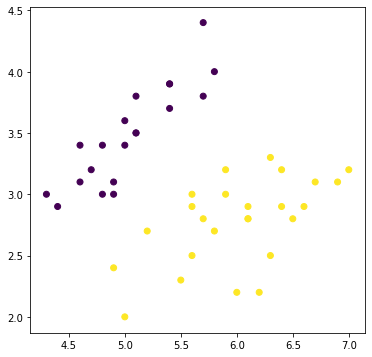

In [258]:
### visualize training data in 2D ###

# x-axis: sepal length, y-axis: sepl width
# use 2 colors to visualize 2 different classes of data 

fig = plt.figure(figsize = (6,6))
    
plt.scatter(x = training_data[:,0], y = training_data[:,1], c=training_data[:,2])


In [259]:
#normalize and centre data on zero
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(training_data[:,:2])
training_data[:,:2] = scaler.transform(training_data[:,:2])

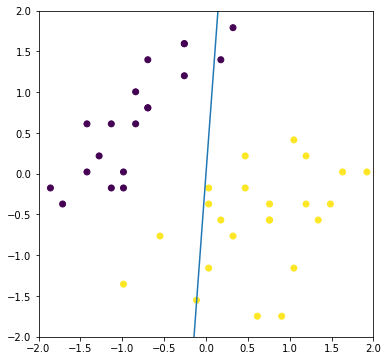

In [336]:
# training loop ###
n_iterations = 5000
#np.random.seed(42)
# initialize weights (set bias to zero)
w1 = np.random.rand(2,1)
b1 = 0
# write a loop of arbitrary n iterations
for n in range(n_iterations):
    x_rand_idx = np.random.randint(0, m_train)

    x = np.reshape(training_data[x_rand_idx, :2], (1,2))
    x_y_hat = int(training_data[x_rand_idx, 2])
    
    wx = np.dot(w.T,x.T)
    
    if (x_y_hat == 1) and (wx < 0):
        #print('yes')
        w1 += x.T
    elif (x_y_hat == 0) and (wx > 0):
        #print('no')
        w1 -= x.T
    #plot_border(w1,b1,training_data)

# print('w {}'.format(w1.shape))
# print('x {}'.format(x.shape))

plot_border(w1,b1,training_data)

# update the weights by randomly selecting a point from the training dataset  
# plot the result after each iteration, and the final result

In [ ]:
test_data[:,:2] = scaler.transform(test_data[:,:2])

In [310]:
### evaluation ###

sepal_length = test_data[:, 0]
sepal_width = test_data[:, 1]

# # perform prediction on the test dataset
predictions = guess_flower(sepal_length, sepal_width)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1])

In [311]:
#evaluate the results by accruacy

is_correct = np.where(predictions==test_data[:,2], 1, 0)

accuracy = np.sum(is_correct) / len(test_data)
print('Algorithem accuracy is %3.2f percent' % (accuracy*100))

Algorithem accuracy is 41.51 percent


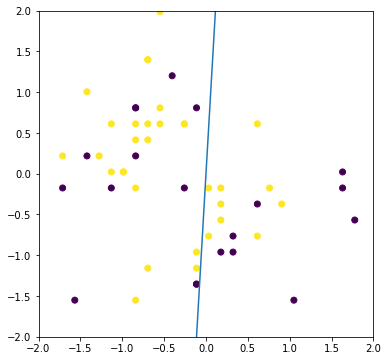

In [312]:
evaluated_predictions = test_data.copy()
evaluated_predictions[:,2] = predictions

### plot the evaluation result ###
plot_border(w1, b1, evaluated_predictions)